In [1]:
from my_utils import *
import pandas as pd
from ReadAndWrite import RAW
import numpy as np
raw = RAW()

In [2]:
cn_or_en = './log_dir_5_5_1d_english'
save_folder = './Img/english_1d_5_5/'

In [3]:
csv_filelist = getFilePathList(cn_or_en, "csv")

In [4]:
#recall.csv  train_acc.csv train_loss.csv f1.csv
dev_acc_filelist = getAccuracyFileList(csv_filelist, 'accuracy.csv')
dev_loss_filelist = getAccuracyFileList(csv_filelist, 'dev_loss.csv')
precision_filelist = getAccuracyFileList(csv_filelist, 'precision.csv')
recall_file_filelist = getAccuracyFileList(csv_filelist, 'recall.csv')
train_acc_filelist = getAccuracyFileList(csv_filelist, 'train_acc.csv')
train_loss_filelist = getAccuracyFileList(csv_filelist, 'train_loss.csv')
f1_filelist = getAccuracyFileList(csv_filelist, 'f1.csv')

In [5]:
# 第k1行到第k2行，第j1列到第j2列的子列表
def getSubList(data, k1, k2, j1,j2):
    sub_List = []
    for row in data[k1:k2]:
        sub_List.append(row[j1:j2])
    return sub_List

# 返回行数和列数
def get_num_rows_cols(lst):
    num_rows = len(lst)
    num_cols = len(lst[0]) if num_rows else 0
    return num_rows, num_cols

def selectValues(lst, k):
    new_lst = []
    for i in range(0, len(lst), k):
        new_lst.append(lst[i])
    return new_lst

def selectValues_mean(lst, k):
    new_lst = []
    for i in range(0, len(lst), k):
        if i != 0:
            new_lst.append(np.mean(lst[i:i+k]))
        else:
            new_lst.append(lst[i])
    return new_lst

def getMinList(data_list):
    """
    Returns the one dimensional list from a two dimensional list that has the smallest length.

    Args:
    data_list (list): a two dimensional list whose one dimensional lists need to be checked

    Returns:
    list: the one dimensional list from the input list with the smallest length
    """
    min_list = data_list[0]
    for lst in data_list:
        if len(lst) < len(min_list):
            min_list = lst
    return min_list

In [6]:
# data = readCsv(acc_filelist[0])
# print(len(data))
# print(get_num_rows_cols(data))
# getSubList(data,1,51,1,3)


In [7]:
# pd.read_csv(acc_filelist[0])

In [8]:
#　参数解释，
def PltLineChart(data_dic, title, HoriLine, savepath, x_label, y_label):
    # 获取数据的键和值
    keys = list(data_dic.keys())
    values = list(data_dic.values())
    # 绘制折线图
    fig = plt.figure()
    for i in range(len(keys)):
        # 绘制折线图
        plt.plot(HoriLine, values[i], label=keys[i])
        # 添加数据点标识
#         for j in range(len(HoriLine)):
#             plt.annotate(str(values[i][j]), xy=(HoriLine[j], values[i][j]))
    # 添加标题和标签
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    # 添加图例
    plt.legend()
    plt.savefig(savepath)
    # 显示图形
    plt.show()

D:\Program\anaconda\envs\TorchBERT\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
D:\Program\anaconda\envs\TorchBERT\lib\site-packages\ipykernel_launcher.py:38: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-

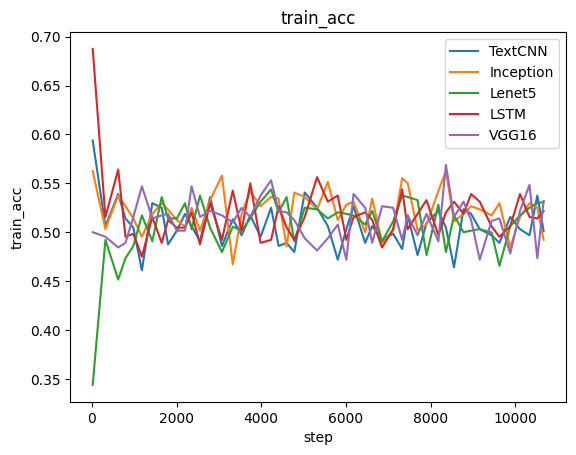

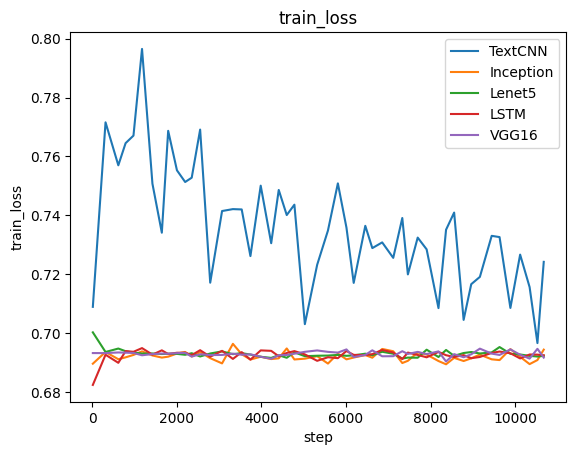

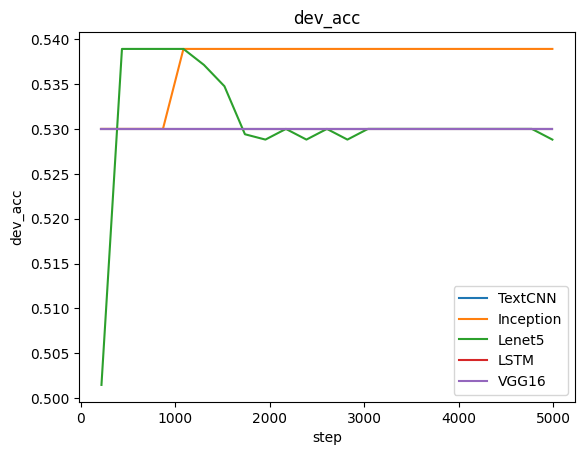

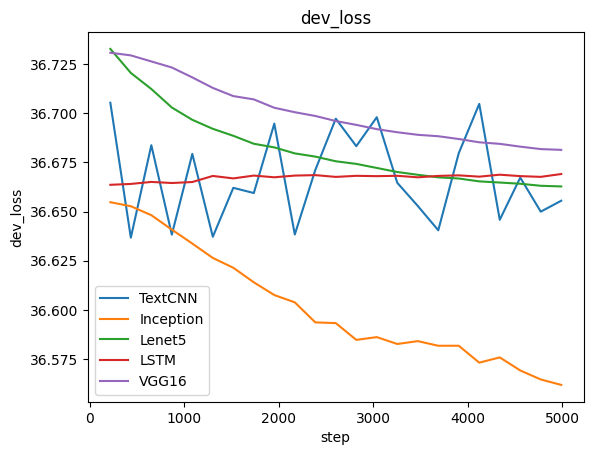

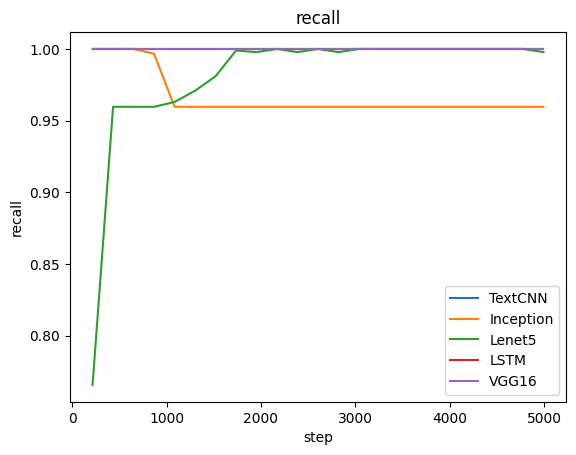

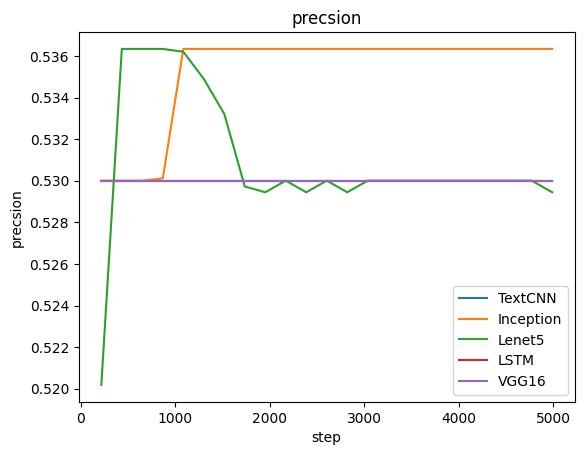

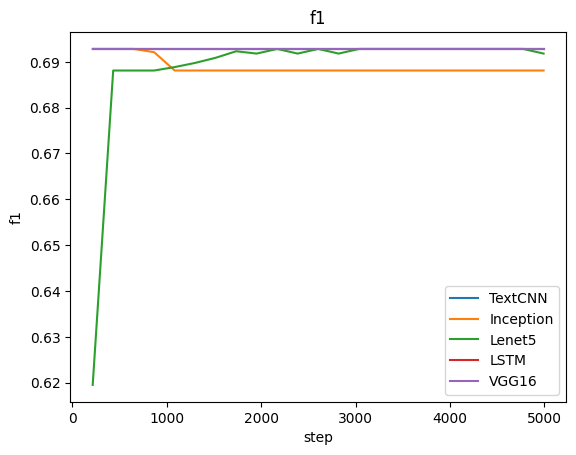

In [9]:
indecators = {'train_acc':train_acc_filelist, 'train_loss':train_loss_filelist, 'dev_acc':dev_acc_filelist, 'dev_loss':dev_loss_filelist, 'recall':recall_file_filelist, 'precsion':precision_filelist, 'f1':f1_filelist}
models = ['TextCNN', 'Inception', 'Lenet5', 'LSTM', 'VGG16']

steps = []
for i in range(0, len(indecators)):
    line_value = {"TextCNN":[], "Inception": [], "Lenet5": [], "LSTM": [], "VGG16": []}
    for file in indecators[list(indecators.keys())[i]]:
        data = readCsv(file)
        num_rows, num_cols = get_num_rows_cols(data)
        if 'TextCNN' in file:
            steps.append(getSubList(data, 1, num_rows, 1, 2))
            line_value['TextCNN'].append(getSubList(data, 1, num_rows, 2, 3))
        elif 'inception' in file:
            steps.append(getSubList(data, 1, num_rows, 1, 2))
            line_value['Inception'].append(getSubList(data, 1, num_rows, 2, 3))
        elif 'Lenet5' in file:
            steps.append(getSubList(data, 1, num_rows, 1, 2))
            line_value['Lenet5'].append(getSubList(data, 1, num_rows, 2, 3))
        elif 'Lstm' in file:
            steps.append(getSubList(data, 1, num_rows, 1, 2))
            line_value['LSTM'].append(getSubList(data, 1, num_rows, 2, 3))
        elif 'vgg16' in file:
            steps.append(getSubList(data, 1, num_rows, 1, 2))
            line_value['VGG16'].append(getSubList(data, 1, num_rows, 2, 3))


    for j in range(0, len(steps)):
        # steps[j] = sum(steps[j], [])
        steps[j] = np.array(steps[j]).astype(np.int).squeeze().tolist()

    step = getMinList(steps)

    select_step = 20 if len(step) >= 1000 else 1


    # steps = steps[i] for i in len(steps) if len(steps[i]) == min(steps)
    for key in line_value.keys():
        line_value[key] = np.array(line_value[key]).astype(np.float).squeeze().tolist()[0:len(step)]
        line_value[key] = selectValues_mean(line_value[key], select_step)
    step = selectValues(step, select_step)
    try:
        raw.CreateFolder(save_folder)
    except:
        pass
    PltLineChart(line_value, list(indecators.keys())[i], step, save_folder+'/'+list(indecators.keys())[i]+'.jpg', 'step', list(indecators.keys())[i])